# MABSim and SMPyBandits

## Averaged Results using Repetitions 

In this notebook, we present the same example but using repeated episodes for averaging.

In [10]:
#Dependencies
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Arms
from mabarms import ExtendedBernoulli

#Policies
from SMPyBandits.Policies import UCBalpha
from mabalgs import ClassicEpsilonGreedy, SafeEpsilonGreedy, SafeUCBalpha

#Simulation
from mabsim import mabs

In [24]:
plt.rcParams['figure.figsize'] = (10, 5)

#MAB parameters
#means = np.array([0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5, 0.55])
means = np.concatenate((np.repeat(0.1, 100), np.repeat(0.6, 5), [0.8]))
k = len(means)
maxr = +1.0
minr = -1.0
ampl = maxr - minr

#arms objects
A = [ExtendedBernoulli(m, maxr=maxr, minr=minr) for m in means]

#algorithm
#g = UCBalpha(k, alpha=1.0*ampl)  #alpha is related to the amplitude of rewards
g = ClassicEpsilonGreedy(k, epsilon=0.1)

#time-horizon
tau = 1000

#repetitions
n = 200

#initial budget
b_0 = 5.0

#window average parameter
win = tau//10

M = mabs(A, g, tau, repetitions=n, window=win)
M.run(tqdm_leave=True)

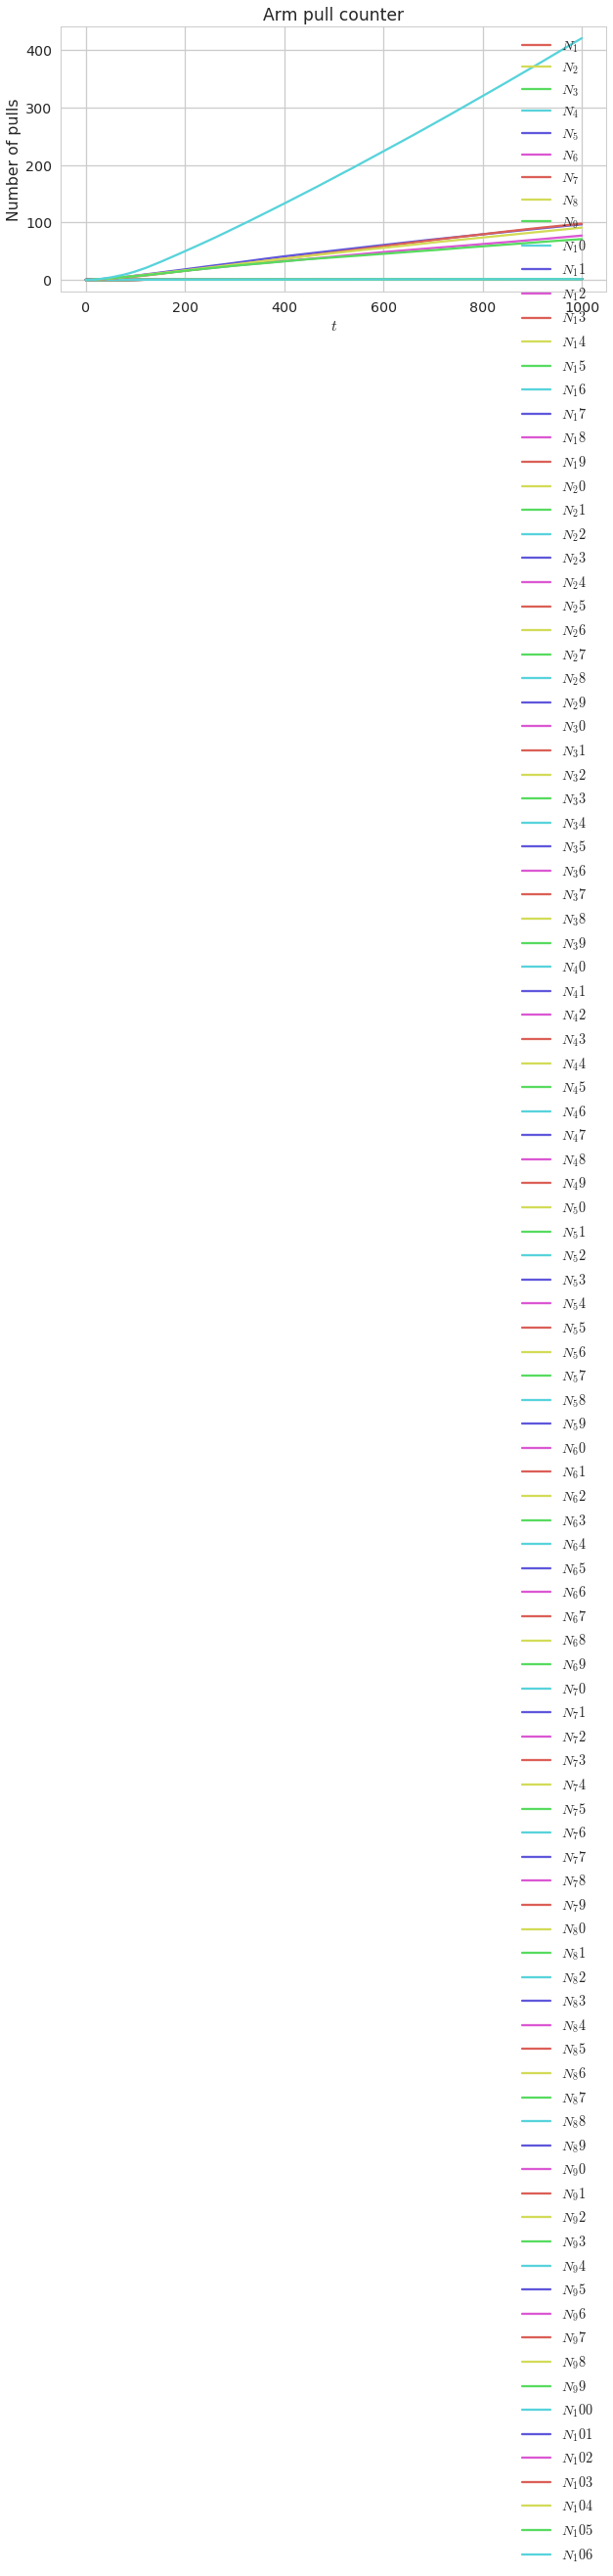

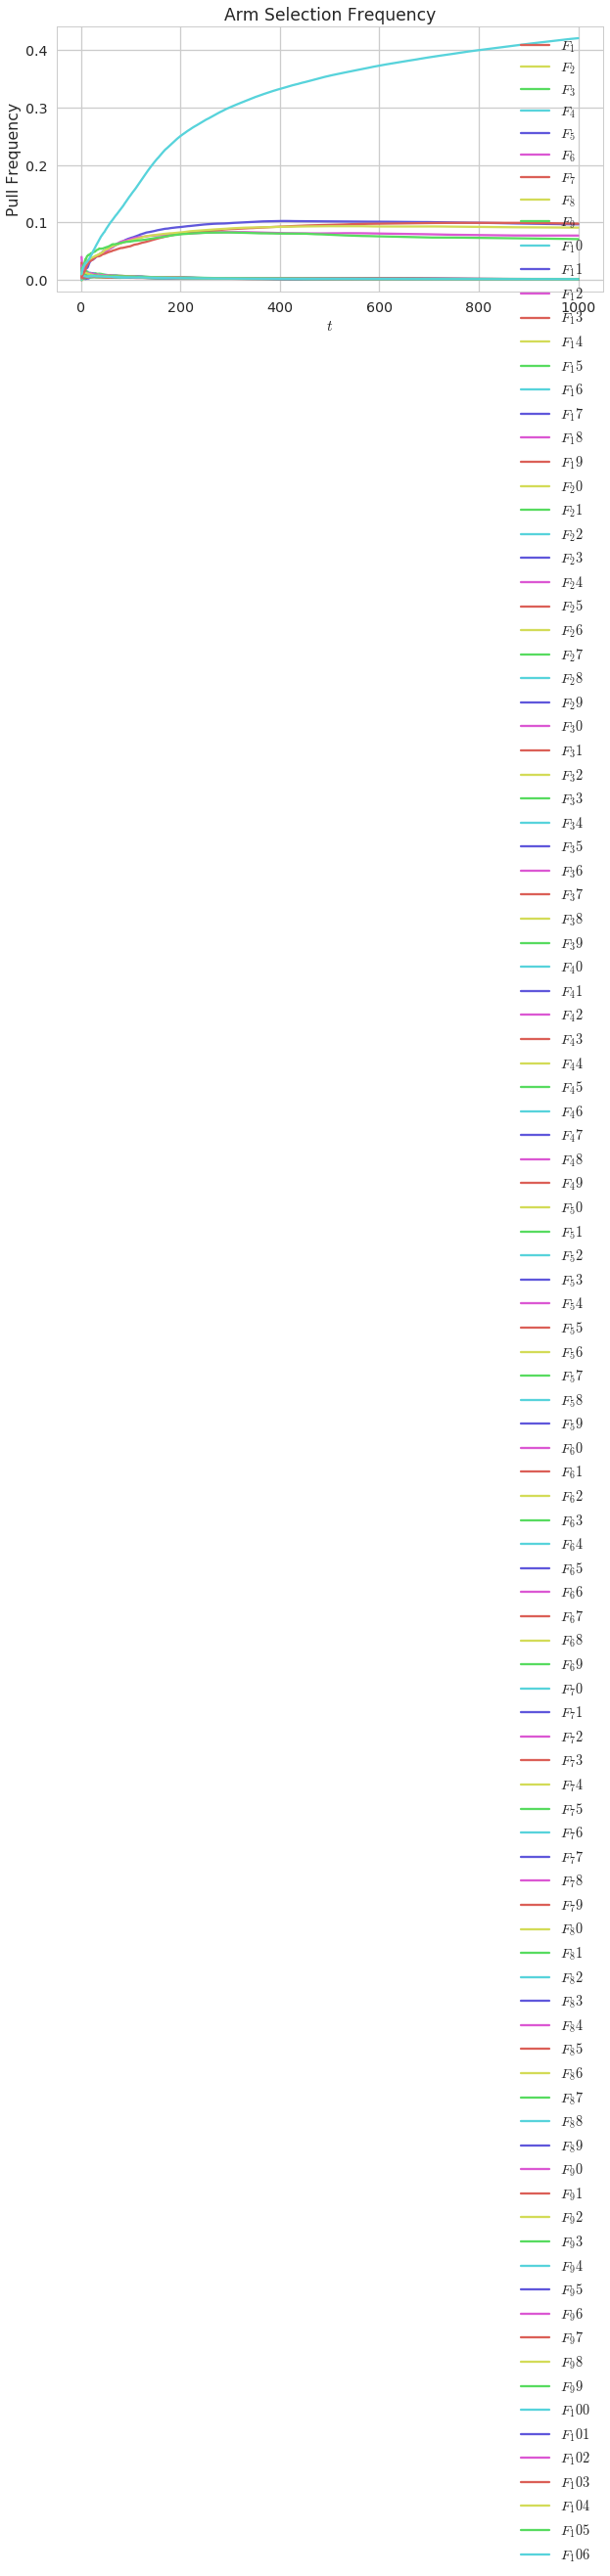

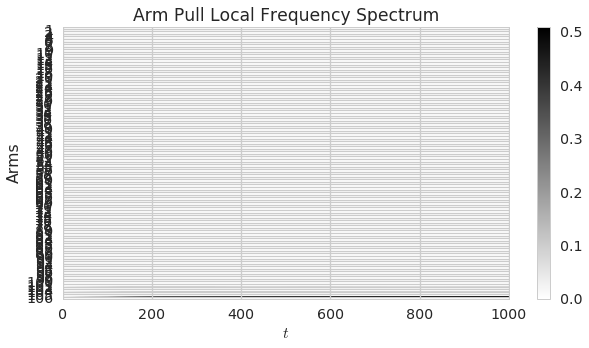

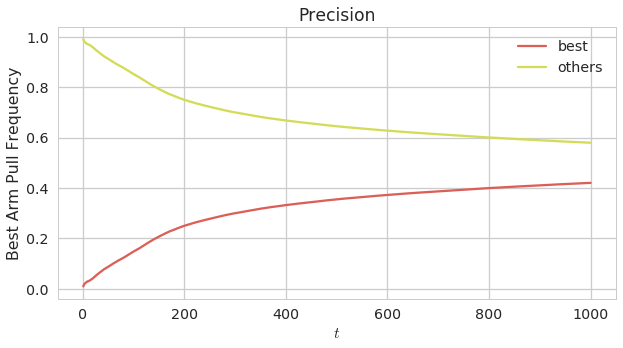

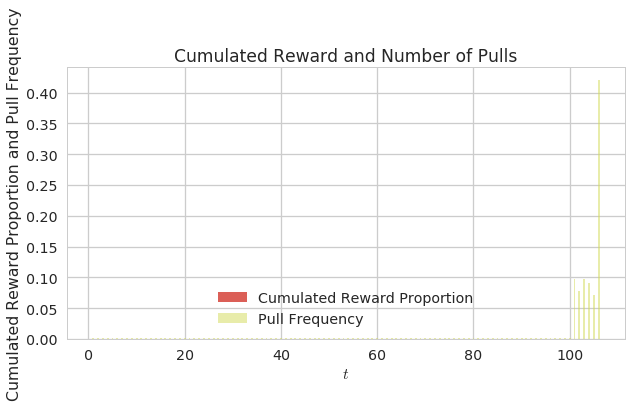

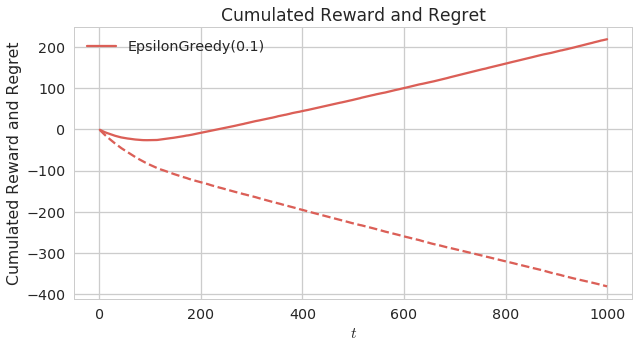

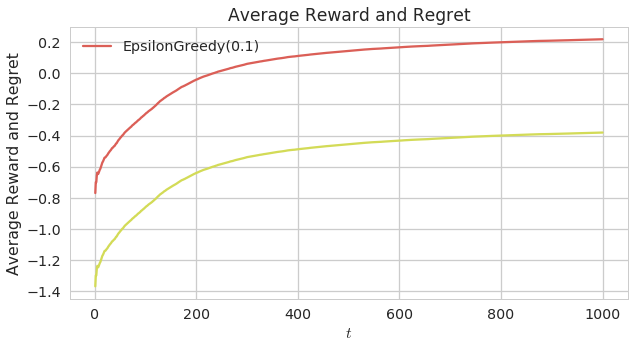

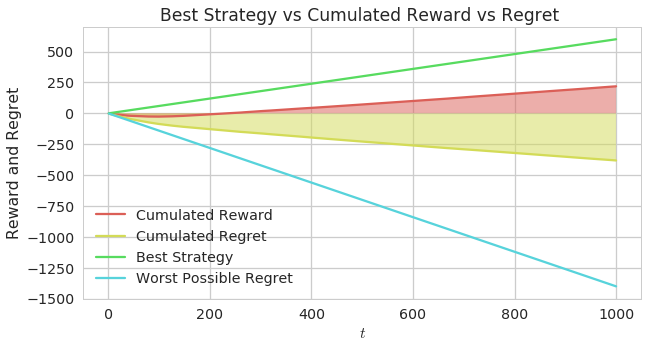

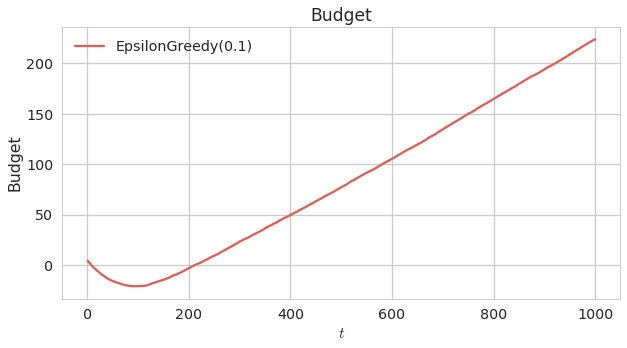

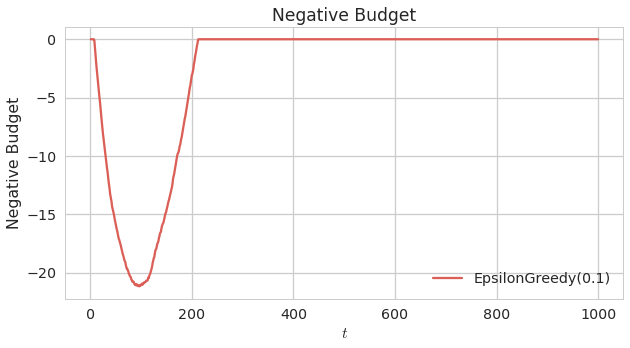

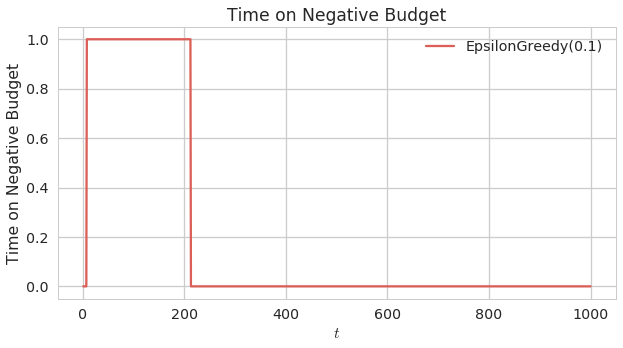

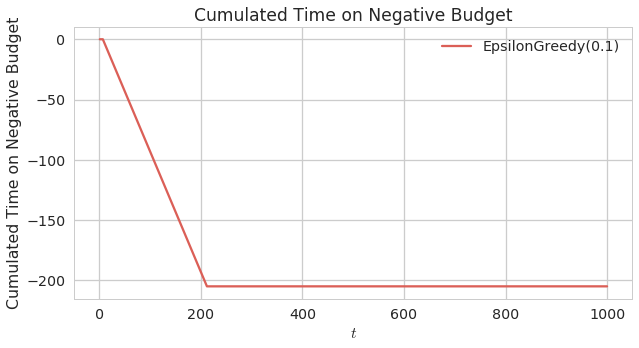

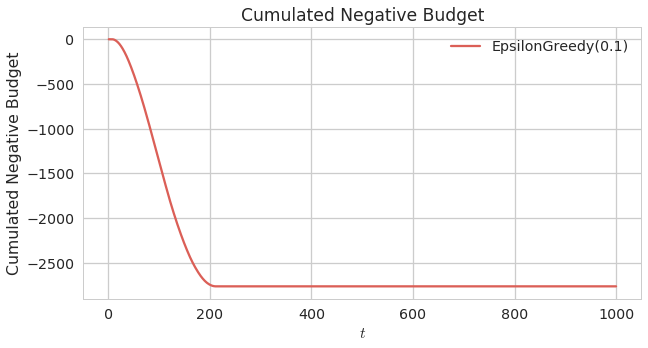

In [25]:
def plotmab(M):

    #M.plot_action_count_progression()
    #M.plot_action_freq_progression()
    #M.plot_action_window_freq_spectrum()
    #M.plot_precision_progression()

    ##M.plot_comp_arm_count()
    ##M.plot_comp_arm_rewards()
    #M.plot_comp_freq_prop()

    M.plot_cumulated_reward_regret_progression()
    M.plot_average_reward_regret_progression()

    #M.plot_cumulated_reward_progression()
    #M.plot_average_reward_progression()
    #M.plot_cumulated_regret_progression()
    #M.plot_average_regret_progression()
    M.plot_reward_regret()

    M.plot_budget_progression(inibudget=b_0)
    M.plot_negative_budget_progression(inibudget=b_0)
    M.plot_negative_budget_time(inibudget=b_0)
    M.plot_negative_budget_time_progression(inibudget=b_0)
    M.plot_cumulated_negative_budget_progression(inibudget=b_0)
    
plotmab(M)

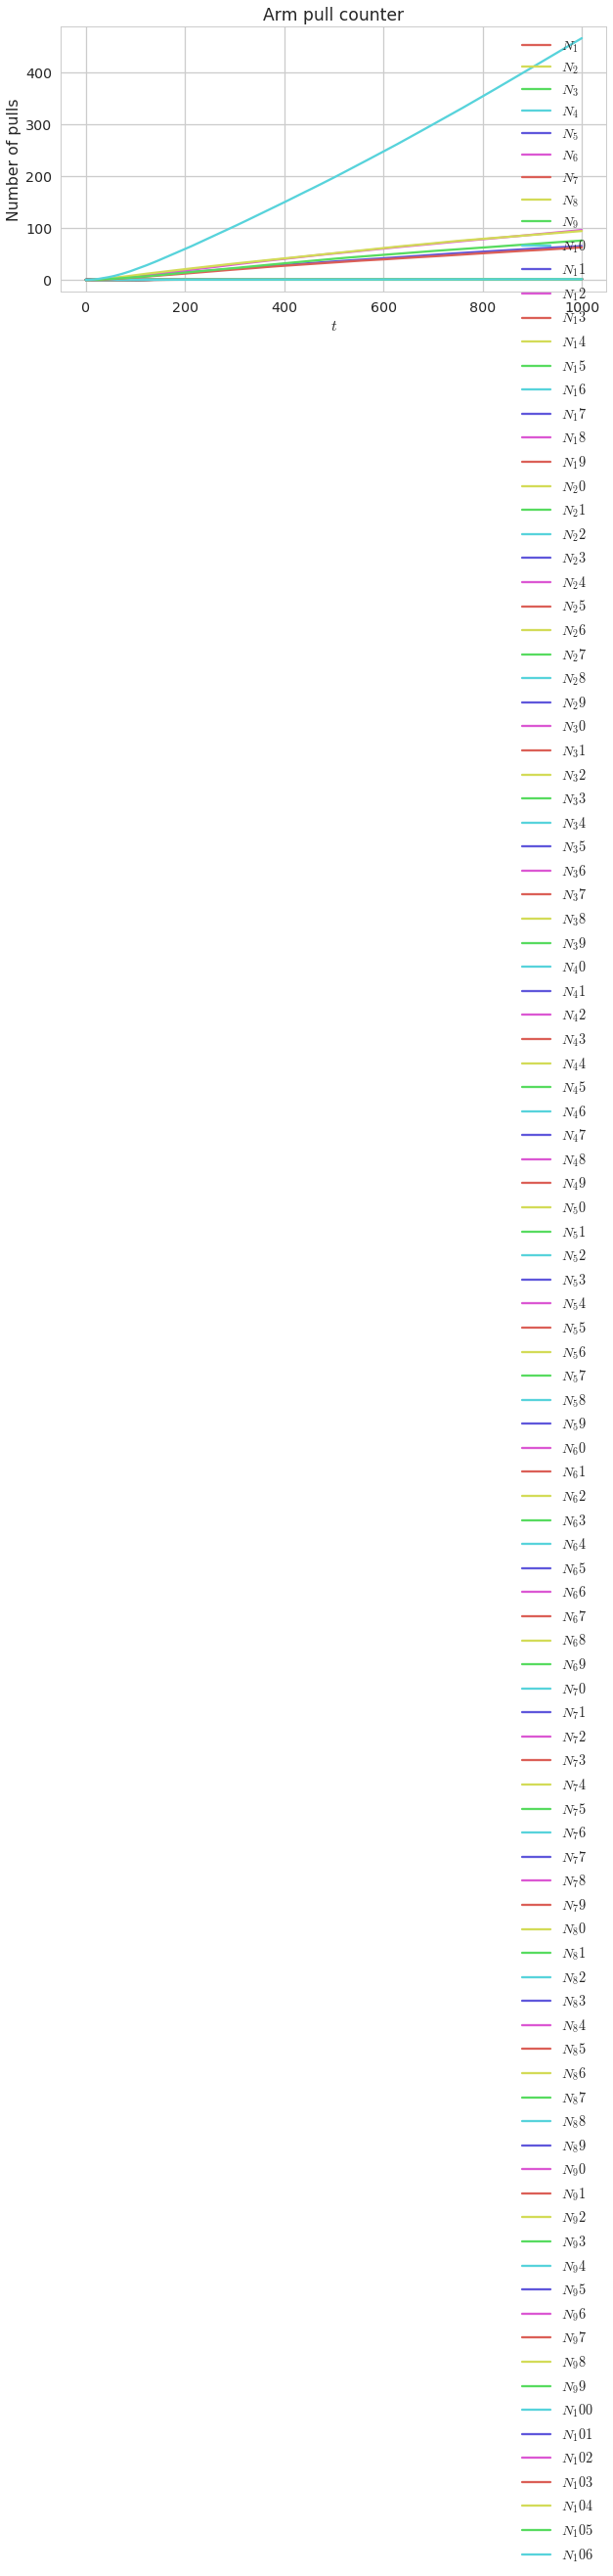

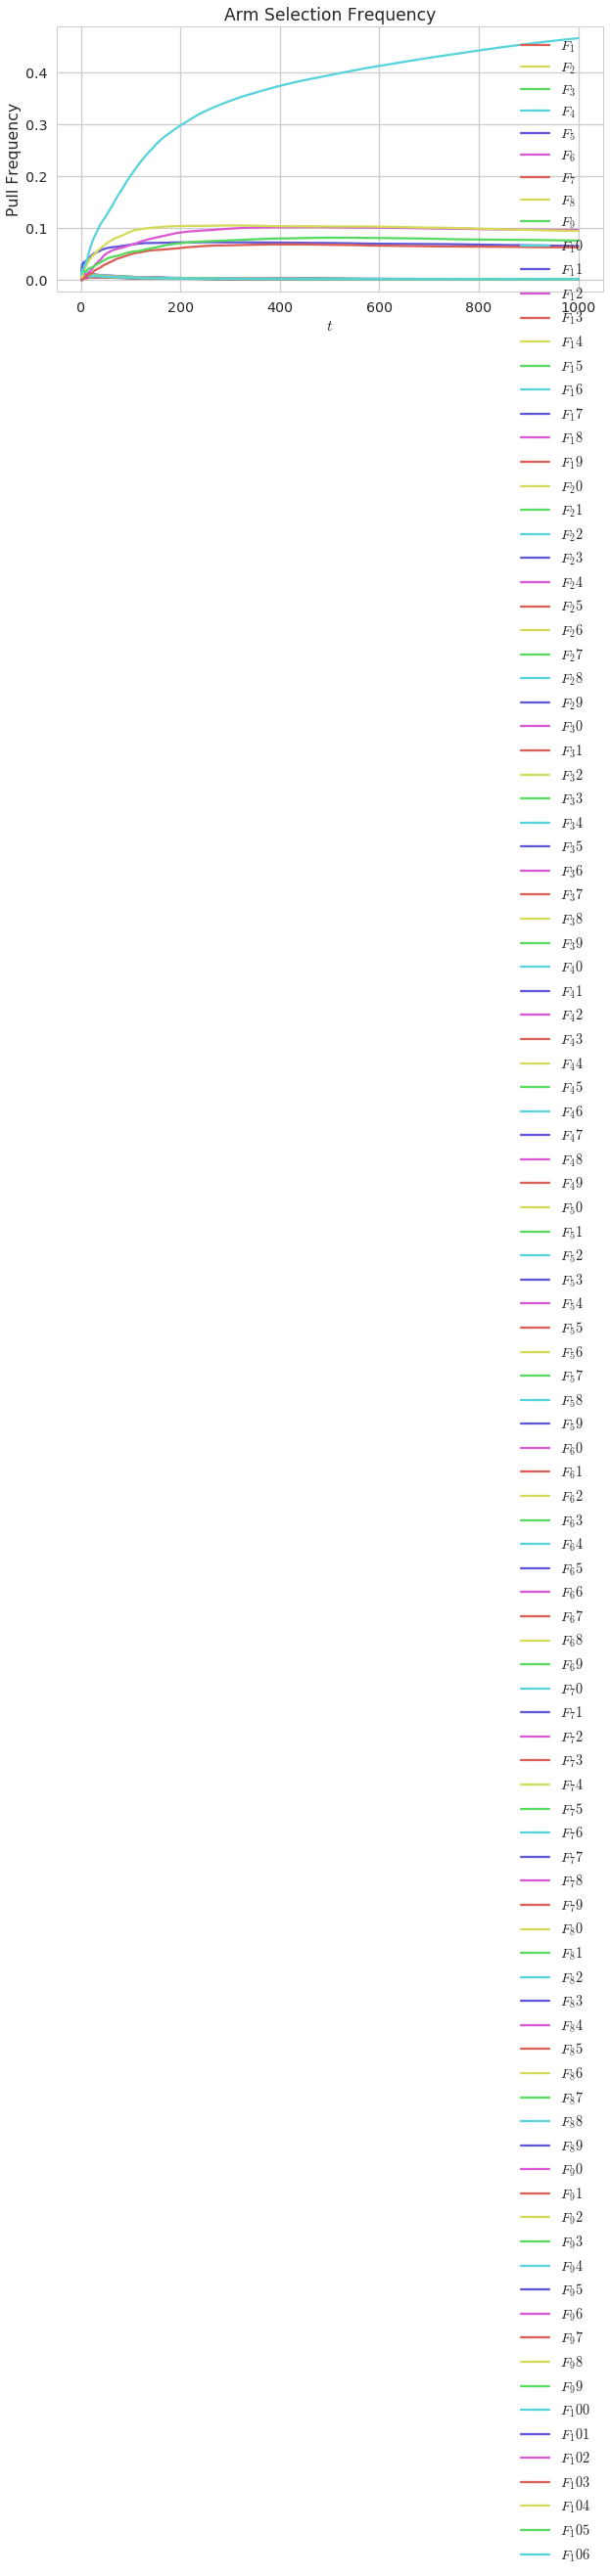

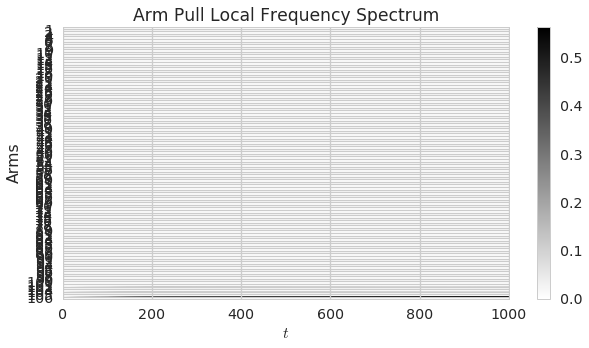

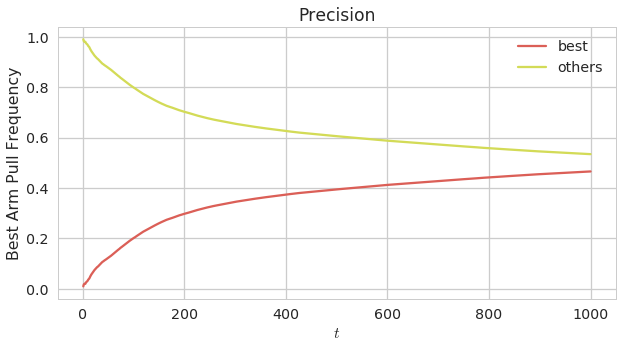

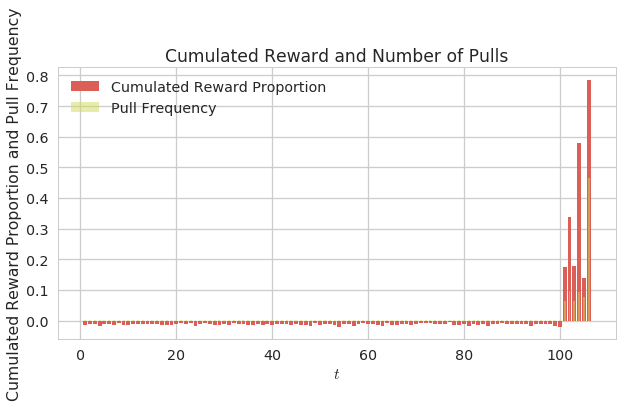

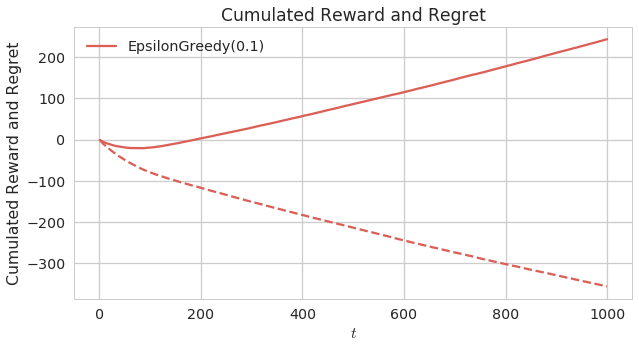

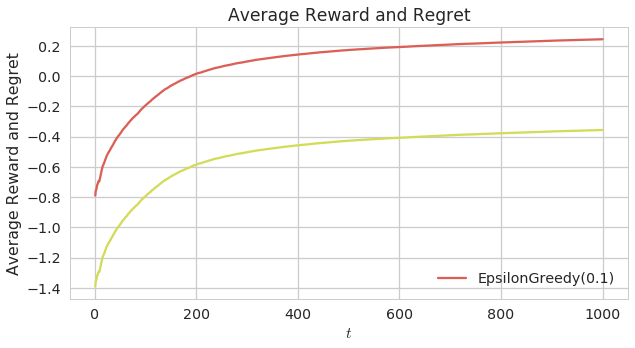

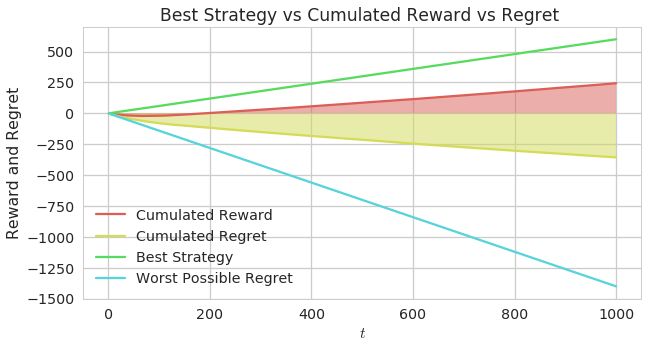

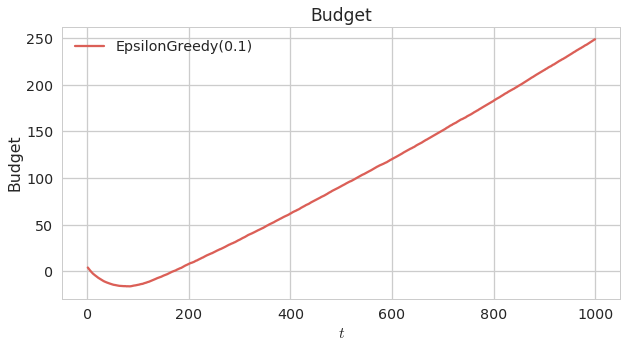

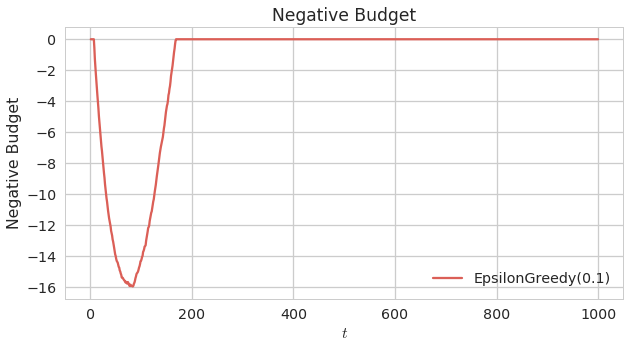

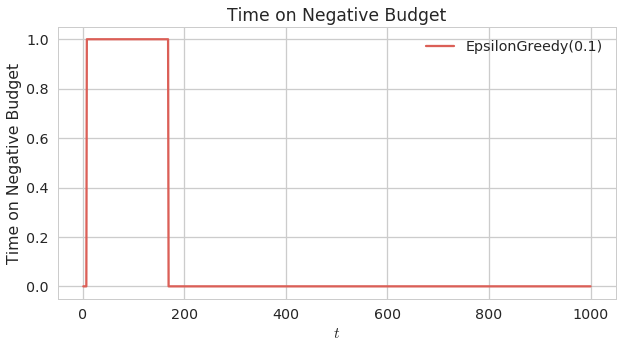

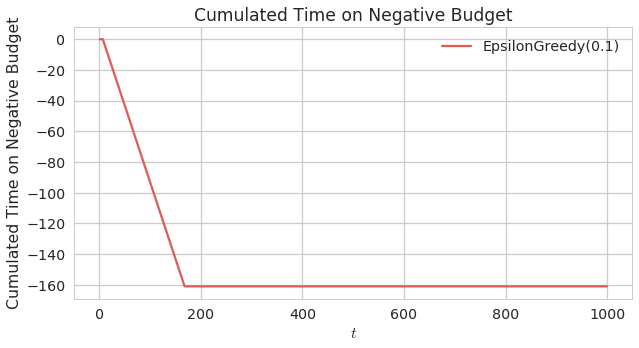

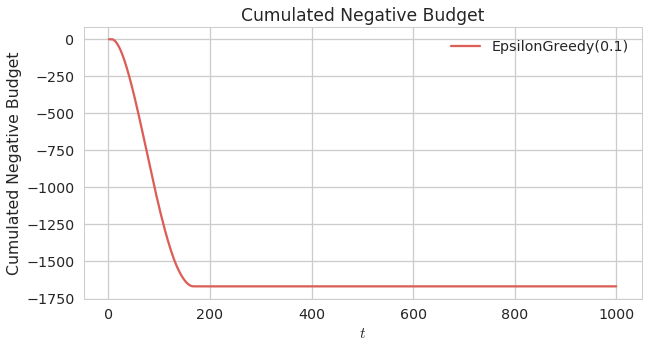

In [26]:
#g = SafeUCBalpha(k, alpha=1.0*ampl, inibudget=10.0, safebudget=1.0, lower=-1.0, amplitude=2.0)
g = SafeEpsilonGreedy(k, epsilon=0.1, inibudget=b_0, safebudget=1.0, lower=-1.0, amplitude=2.0)

M = mabs(A, g, tau, repetitions=n, window=win)
M.run(tqdm_leave=True)

plotmab(M)